Accuracy: 0.949468085106383
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.86      0.93       175
         comp.graphics       0.98      0.99      0.99       200
               sci.med       0.98      0.96      0.97       200
soc.religion.christian       0.85      0.98      0.91       177

              accuracy                           0.95       752
             macro avg       0.95      0.95      0.95       752
          weighted avg       0.95      0.95      0.95       752



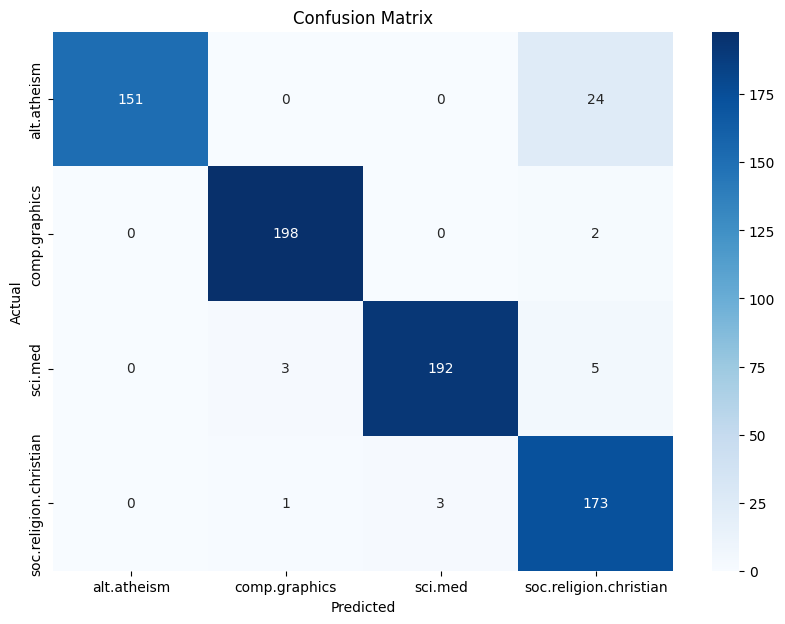

Email: The graphics card in the new computer is amazing!
Predicted Category: comp.graphics

Email: Religion is a personal belief system and should be respected.
Predicted Category: soc.religion.christian

Email: I need help with my medical condition.
Predicted Category: sci.med

Email: Atheism is the absence of belief in deities.
Predicted Category: alt.atheism



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fetching the dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories)

# Converting the data to a DataFrame
df = pd.DataFrame({'text': newsgroups_data.data, 'target': newsgroups_data.target})

# Preprocessing the data
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])
y = df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
report = classification_report(y_test, y_pred, target_names=newsgroups_data.target_names)
print(report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups_data.target_names, yticklabels=newsgroups_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Making predictions on new data
new_emails = [
    "The graphics card in the new computer is amazing!",
    "Religion is a personal belief system and should be respected.",
    "I need help with my medical condition.",
    "Atheism is the absence of belief in deities."
]
new_emails_transformed = vectorizer.transform(new_emails)
predictions = model.predict(new_emails_transformed)

for email, category in zip(new_emails, predictions):
    print(f"Email: {email}\nPredicted Category: {newsgroups_data.target_names[category]}\n")
